In [ ]:
#HOMEWORK 3 DANIELLA SALIMA

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.set_printoptions(suppress=True, precision=4)

In [34]:
df = pd.read_csv("diabetes.csv")

# View first 5 rows of data
print("First 5 Rows of Dataset:")
display(df.head())

# Check data info and statistics
print("\nData Information:")
print(df.info())
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
display(df.isnull().sum())

First 5 Rows of Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing Values per Column:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
# Data Preprocessing

# Handle missing or zero values if necessary — for columns where zero is not valid
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())

# Confirm that missing values are handled
print("\nMissing Values After Imputation:")
display(df.isnull().sum())

# Split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalize features (optional but recommended for GaussianNB)
X = (X - X.mean()) / X.std()


Missing Values After Imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
# Modeling

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

In [38]:
# Train the model
model.fit(X_train, y_train)

GaussianNB()

In [39]:
# Evaluation

# Make predictions
y_pred = model.predict(X_test)

In [40]:
# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 74.68%

Confusion Matrix:
[[78 21]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



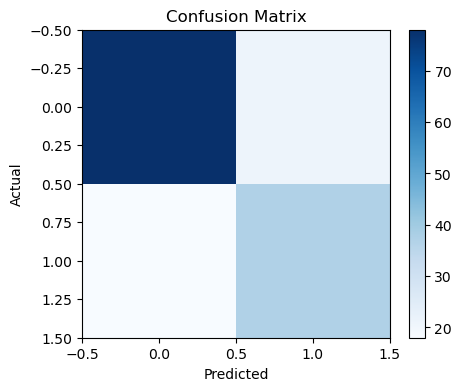

In [41]:
# Optional & Applied: visualize confusion matrix
plt.figure(figsize=(5, 4))
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()